In [29]:
from urllib.request import urlopen
import networkx as nx
import matplotlib.pyplot as plt

url = "https://nats-www.informatik.uni-hamburg.de/pub/GWV1920/%dcbungsaufgaben/blatt3_environment.txt"
array = []
arrayy = []
matrix = []
data = urlopen(url)

for line in data: 
    s = line.strip()
    array.append(s)

#matrix aufbauen aus dem vorhandenen array    
for elem in array:
    for char in elem:
        i = chr(char)
        arrayy.append(i) 
    matrix.append(arrayy)
    arrayy = []

In [30]:
def neighbours(position):
    a, b = position
    speicher = []
    if (a+1, b) in validpos:
        i = a+1, b
        speicher.append(i)
    if (a-1, b) in validpos:
        i = a-1, b
        speicher.append(i)
    if (a, b+1) in validpos:
        i = a, b+1
        speicher.append(i)
    if (a, b-1) in validpos:
        i = a, b-1
        speicher.append(i)
    return speicher

In [40]:
#rekursiv nach startpunkt s suchen
s = []
def find_s(x,y):
    border = len(matrix) -1
    if matrix[x][y] == "s":
        s.append(x)
        s.append(y)
    else:
        #print(x,y)
        if x == border:
            y = y + 1
            x = 0
        x = x+1
        find_s(x,y)
find_s(0,0)
start = tuple(s)
print(start)

(4, 4)


In [51]:
#rekursiv nach zielpunkt g suchen
g = []
def find_g(x,y):
    border = len(matrix) -1
    if matrix[x][y] == "g":
        g.append(y)
        g.append(x)
    else:
        #print(x,y)
        if x == border:
            y = y + 1
            x = 0
        x = x+1
        find_g(x,y)
find_g(0,0)
goal = tuple(g)
print(goal)

(14, 7)


In [52]:
a = 0
b = 0 
dictionary = {}
validpos = []
dictionary2 = {}
for i in matrix:
    for j in i:
        if j == ' ':
            dictionary[a,b] = []
            i = a,b
            validpos.append(i)
        if j == 's':
            dictionary[a,b] = []
            i = a,b
            validpos.append(i)
        if j == 'g':
            dictionary[a,b] = []
            i = a,b
            validpos.append(i)
        a = a + 1
    a = 0
    b = b + 1

for key in dictionary.keys():
    a, b = key
    if (a, b) in validpos:
        dictionary2[key] = set(neighbours(key))
        #print(neighbours(key))

In [53]:
Graph = nx.Graph()
for i in validpos:
    Graph.add_node(i)

for key in dictionary2:
    print(key)
    for var in dictionary2[key]:
        print(var)    
        Graph.add_edge(key, var)

(1, 1)
(1, 2)
(2, 1)
(2, 1)
(3, 1)
(1, 1)
(2, 2)
(3, 1)
(3, 2)
(4, 1)
(2, 1)
(4, 1)
(4, 2)
(5, 1)
(3, 1)
(5, 1)
(6, 1)
(4, 1)
(5, 2)
(6, 1)
(5, 1)
(6, 2)
(7, 1)
(7, 1)
(8, 1)
(6, 1)
(7, 2)
(8, 1)
(9, 1)
(7, 1)
(9, 1)
(8, 1)
(10, 1)
(10, 1)
(11, 1)
(9, 1)
(11, 1)
(11, 2)
(12, 1)
(10, 1)
(12, 1)
(13, 1)
(11, 1)
(12, 2)
(13, 1)
(14, 1)
(12, 1)
(13, 2)
(14, 1)
(13, 1)
(14, 2)
(15, 1)
(15, 1)
(16, 1)
(14, 1)
(15, 2)
(16, 1)
(17, 1)
(16, 2)
(15, 1)
(17, 1)
(16, 1)
(17, 2)
(18, 1)
(18, 1)
(17, 1)
(18, 2)
(1, 2)
(1, 3)
(1, 1)
(2, 2)
(2, 2)
(1, 2)
(3, 2)
(2, 3)
(2, 1)
(3, 2)
(4, 2)
(3, 1)
(3, 3)
(2, 2)
(4, 2)
(3, 2)
(5, 2)
(4, 1)
(4, 3)
(5, 2)
(4, 2)
(5, 1)
(6, 2)
(5, 3)
(6, 2)
(6, 3)
(6, 1)
(5, 2)
(7, 2)
(7, 2)
(7, 3)
(6, 2)
(7, 1)
(11, 2)
(12, 2)
(11, 1)
(12, 2)
(11, 2)
(13, 2)
(12, 1)
(13, 2)
(12, 2)
(14, 2)
(13, 1)
(14, 2)
(14, 1)
(13, 2)
(15, 2)
(15, 2)
(15, 3)
(14, 2)
(16, 2)
(15, 1)
(16, 2)
(17, 2)
(16, 3)
(16, 1)
(15, 2)
(17, 2)
(17, 1)
(17, 3)
(16, 2)
(18, 2)
(18, 2)
(17, 2)
(18, 3)
(1

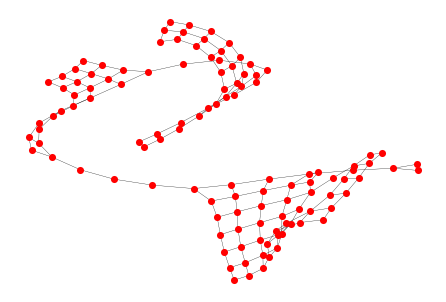

In [54]:
options = {
    'node_color': 'red',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.3,
}
nx.draw(Graph, **options)
#plt.show()


In [55]:
Graph.number_of_nodes()
Graph.nodes
Graph[start]


AtlasView({(4, 3): {}, (3, 4): {}, (4, 5): {}, (5, 4): {}})

In [67]:
goal = (14, 7)
def BFS(graph, s):
    queue = [] 
    visited = [] #besuchte Knoten
    current = s #aktueller Knoten
    #der startknoten wird in beiden Listen hinzugefuegt
    queue.append(tuple(s)) 
    visited.append(tuple(s))
    
    while current != goal:
        current = queue.pop(0)#der aktuelle Knoten ist der Kopf der Queue
        if current not in visited:
            visited.append(current) #bis dahin unbesuchten Knoten werden yu den besuchten hinzugefuegt
            if current != goal:
            for i in Graph[current]: #die Nachbarn des aktuellen Knotens werden, falls noch nicht besucht in der Queue hinzugefuegt
                if i in visited:
                    next
                else:
                    queue.append(i)

    print(visited)
      
   

In [68]:
BFS(Graph, start)

[(4, 4), (4, 3), (3, 4), (4, 5), (5, 4), (4, 2), (3, 3), (5, 3), (2, 4), (3, 5), (5, 5), (6, 4), (4, 1), (3, 2), (5, 2), (2, 3), (6, 3), (1, 4), (2, 5), (5, 6), (6, 5), (7, 4), (3, 1), (5, 1), (2, 2), (6, 2), (1, 3), (7, 3), (1, 5), (2, 6), (5, 7), (7, 5), (8, 4), (2, 1), (6, 1), (1, 2), (7, 2), (1, 6), (2, 7), (4, 7), (6, 7), (5, 8), (9, 4), (1, 1), (7, 1), (1, 7), (3, 7), (2, 8), (4, 8), (6, 8), (9, 3), (9, 5), (8, 1), (1, 8), (3, 8), (9, 1), (10, 1), (11, 1), (11, 2), (12, 1), (12, 2), (13, 1), (13, 2), (14, 1), (14, 2), (15, 1), (15, 2), (16, 1), (15, 3), (16, 2), (17, 1), (15, 4), (16, 3), (17, 2), (18, 1), (14, 4), (16, 4), (17, 3), (18, 2), (13, 4), (17, 4), (18, 3), (12, 4), (18, 4), (11, 4), (12, 5), (11, 5), (12, 6), (11, 6), (13, 6), (12, 7), (11, 7), (13, 7), (14, 6), (12, 8), (10, 7), (11, 8), (14, 7)]


In [70]:
goal= (14,7)
#DFS-Methode
def DFS(graph, s):
    visitedNodes = [] #liste der bereits besuchten Knoten
    current = s
    stack = [(4,4)] #Stack für die Tiefensuche
    i = 0
    stack [0]
    while current != goal:
        current = stack.pop() #der aktuelle Knoten ist der letze der auf den STack getan wurde
        if current == goal:
            visitedNodes.append(current) #der aktuelle Knoten wird zu den bereits besuchten Knoten hinzugefügt
            i += 1
            print(len(visitedNodes))
            print(visitedNodes)
        else:
            for neighbour in dictionary2[current]: # für jeden  Knoten werden die Nachbarn zum Stack hinzugefügt 
                if not neighbour in visitedNodes:
                    stack.append(neighbour)
            visitedNodes.append(current)

In [71]:
DFS(Graph, start)

124
[(4, 4), (4, 3), (5, 3), (5, 2), (6, 2), (7, 2), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (1, 3), (1, 2), (1, 1), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (2, 7), (2, 6), (2, 5), (3, 5), (3, 4), (3, 3), (3, 2), (4, 2), (4, 5), (5, 5), (6, 5), (7, 5), (7, 4), (8, 4), (9, 4), (9, 3), (9, 5), (7, 3), (6, 3), (6, 4), (5, 4), (6, 4), (6, 4), (5, 6), (5, 7), (5, 8), (4, 8), (4, 7), (3, 7), (3, 8), (3, 8), (6, 8), (6, 7), (6, 7), (4, 7), (5, 4), (3, 7), (3, 8), (2, 7), (2, 6), (2, 5), (3, 4), (2, 5), (3, 3), (1, 3), (3, 2), (1, 2), (1, 1), (3, 2), (4, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (12, 2), (13, 2), (13, 1), (14, 1), (15, 1), (15, 2), (16, 2), (16, 1), (17, 1), (18, 1), (18, 2), (18, 3), (18, 4), (17, 4), (16, 4), (16, 3), (17, 3), (17, 2), (15, 3), (15, 4), (14, 4), (13, 4), (12, 4), (11, 4), (11, 5), (11, 6), (12, 6), (12, 5), (12, 7), (12, 8), (13, 8), (14, 8), (15, 8), (16, 8), (16, 7), (17, 7), (17, 6), (18, 6), (18, 7), (18, 8), 